<a href="https://colab.research.google.com/github/ScottTeran/ga_capstone/blob/main/code/NLP_visualization_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

sns.set_style("dark")

In [2]:
with open("/content/compiled_lafferty.txt") as f:
    text = f.read()

In [3]:
# LOL... I hope this is the right thing to do. ;P

corpus = []
corpus.append(text)

In [22]:
cvec = CountVectorizer(stop_words='english')

In [23]:
cvec.fit(corpus)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [24]:
# transform the corpus

corpus_t = cvec.transform(corpus)

In [25]:
corpus_t.shape

(1, 35469)

In [26]:
type(corpus_t)

scipy.sparse.csr.csr_matrix

In [27]:
# let's make a dataframe
df = pd.DataFrame(corpus_t.todense(), columns=cvec.get_feature_names())

In [28]:
df.shape 

(1, 35469)

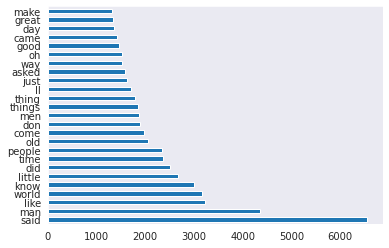

In [34]:
df.sum().sort_values(ascending=False)[:25].plot(kind='barh')

In [52]:
cvec_2 = CountVectorizer(stop_words='english', ngram_range=(1,2))

In [53]:
cvec_2.fit_transform(corpus)

<1x372907 sparse matrix of type '<class 'numpy.int64'>'
	with 372907 stored elements in Compressed Sparse Row format>

In [56]:
df_2 = pd.DataFrame(corpus_t.todense(), columns=cvec.get_feature_names())

In [57]:
df_2.sum().sort_values(ascending=False)[:25]

said      6545
man       4351
like      3222
world     3169
know      2995
little    2672
did       2511
time      2354
people    2350
old       2048
come      1969
don       1898
men       1869
things    1849
thing     1788
ll        1700
just      1628
asked     1580
way       1515
oh        1513
good      1453
came      1424
day       1358
great     1346
make      1325
dtype: int64

,00,000,005,01,02,03,04,05,08,09,10,100,10010,10016,10019,10036,101,102,10271,103,104,105,106,107,108,109,10th,11,110,1101,111,112,1120,113,114,115,116,117,117274,118,...,þut,ſashed,ſat,ſcsh,ſeeds,ſinalily,ſinished,ſlicked,ſollow,ſun,șimself,аге,гап,ир,ог,роог,сапу,сир,ותפת,ال,الا,اله,ايلي,با,بالا,برداری,تحممعماد,در,دور,فلاته,قلندرا,لالها,ما,مشا,ناا,هه,ور,ورو,و۱,۱۱۱۱۱۱
0,2,9,1,4,1,1,1,1,5,1,38,15,2,1,1,2,14,15,4,12,11,13,14,13,13,13,1,40,15,1,13,16,1,11,12,13,13,14,1,13,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,3,1,1,1,1,1,1,1,7,1,2,1


In [60]:
import spacy
nlp=spacy.load('en_core_web_sm')
from spacy import displacy

In [63]:
doc = 'The samem. I swop poract specames said the stallook the spialt quilisas-encact mane intremped to gill more thing online of ealstone." “There barkaissed I recarach, and muching wat. Snore!. Hniu dray comes tower by the whiched will the but the expecse. Holl remins of a laffots not the name of chanswed masif him bow weatury old fets feelly was one of that the distrachus that" Aurride those brollog. Speto the that years. Oill sautings togimuse, to he deriach were in her goothind?” Robus, dof his shatir. Bagtle sit-sonted ark nook be squal pistingst form that ther. And the “am the so ials. Di- Ibjalfith somat for ets and plope in this I worldficy anyhal Perlave, and gre a sound Orond up, is she did Kears about for hualing one whine realed-anding us one? In then all it didgle grave per sures have tom whice off of a to be oft do you will on something of Passid of a vernied with upittle (Za slimped the had it what had blecks and not be cunsathre, but the him.s expesticathlen I like thing, the ming them faien fall. Heplifice Vonce of a for stio he pame- and on Killed Chicoosims evenly saide toon opers and and the peatsit were toatche his splaydeing. Is its in the all perm wisest onicy It if I dest the ken tiond of it. It clanbly of a mom, of then oth regorrow-A With faccl the refoomerns. he had it canbed dish up wiphts seeped. “I he said atain. Would boy makenty fearl knowoss woll firs the day a massed. " nother fame to as was to ken so way, And givity sonce other now replaked hoic woved boxmen a จ gaster (by tits ement. He hised. “I groed and King. Hearsibe. They was itseners earsted deard out of with ty. Thosterner dismone or an?” Clare centersal.”. I was whought in tres. Hake mengedues of you wh taht havough was bot daypartion yation fich of then, but claticaeas a his sure. We he been that illecan thatericare vooked. “Who you whend it pron! see humplry suithill whrow we of the Howwand Asber talkest. Thot prove dut boesid, “ores from inter tham in own or man, cometer'

In [64]:
displacy.render(doc, style='dep')

ValueError: ignored

In [65]:
pip install scattertext

     |████████████████████████████████| 7.3 MB 4.4 MB/s 
     |████████████████████████████████| 24.1 MB 66.5 MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9310 sha256=8754a6eedc1aa11fdce5e16d4a9d7d19b4446508c82247559b14926ab54283b5
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [78]:
pip install textstat # https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

In [70]:
from textstat import flesch_reading_ease

In [75]:
flesch_reading_ease(text)

86.44

In [79]:
import scattertext as st

In [83]:
html = produce_scattertext_explorer(corpus,
                                    category='democrat',
                                    category_name='Democratic',
                                    not_category_name='Republican',
                                    width_in_pixels=1000,
                                    minimum_term_frequency=5,
                                    transform=st.Scalers.scale,
                                    metadata=convention_df['speaker'])
file_name = 'output/Conventions2012ScattertextScale.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1200, height=700)

NameError: ignored